In [1]:
%matplotlib inline
import math

import matplotlib.pyplot as plt
import numpy as np
from gym import spaces
from gym_miniworld.entity import Ball, Box, Key, MeshEnt
from gym_miniworld.miniworld import MiniWorldEnv
from stable_baselines3.common.vec_env.base_vec_env import tile_images

plt.rcParams['figure.figsize'] = [16, 12]

In [2]:
class Barrel(MeshEnt):
    def __init__(self, size=0.6):
        super().__init__(mesh_name="barrel", height=size, static=True)


class Chair(MeshEnt):
    def __init__(self, size=0.6):
        super().__init__(mesh_name="office_chair", height=size, static=True)


class Cone(MeshEnt):
    def __init__(self, size=0.6):
        super().__init__(mesh_name="cone", height=size, static=True)


class Duckie(MeshEnt):
    def __init__(self, size=0.6):
        super().__init__(mesh_name="duckie", height=size, static=True)


class KeyCard(MeshEnt):
    def __init__(self, size=0.6):
        super().__init__(mesh_name="keycard", height=size, static=True)


class MedKit(MeshEnt):
    def __init__(self, size=0.6):
        super().__init__(mesh_name="medkit", height=size, static=True)


class Potion(MeshEnt):
    def __init__(self, size=0.6):
        super().__init__(mesh_name="potion", height=size, static=True)

In [3]:
class ObjInFront(MiniWorldEnv):
    """Room with one object in from of the agent."""

    def __init__(self, obj_type, **kwargs):
        self.obj_type = obj_type

        super().__init__(**kwargs)
        
        # Reduce the action space
        self.action_space = spaces.Discrete(0)

    def _gen_world(self):
        self.add_rect_room(
            min_x=-5,
            max_x=5,
            min_z=-5,
            max_z=5,
            wall_tex="brick_wall",
            floor_tex="asphalt",
            no_ceiling=True,
        )

        self._direction = self.rand.float(-math.pi, math.pi)
        self._position = [
            1.5 * math.cos(self._direction),
            1,
            1.5 * math.sin(self._direction),
        ]

        if self.obj_type == Box or self.obj_type == Ball or self.obj_type == Key:
            self.place_entity(self.obj_type(color=self.rand.color()), pos=self._position)
        else:
            self.place_entity(self.obj_type(), pos=self._position)

        self.place_entity(self.agent, pos=[0, 0, 0], dir=-self._direction + self.rand.float(-0.3, 0.3))
        
obj_types = [Ball, Barrel, Box, Chair, Cone, Duckie, Key, KeyCard, MedKit, Potion]

In [4]:
train_frames = np.zeros([1000, 64, 64, 3], dtype=np.uint8)
train_labels = np.zeros([1000,], dtype=np.int64)
test_frames = np.zeros([200, 64, 64, 3], dtype=np.uint8)
test_labels = np.zeros([200,], dtype=np.int64)

In [5]:
NUM_TRAIN_SAMPLES_PER_OBJ = train_frames.shape[0] // len(obj_types)
NUM_TEST_SAMPLES_PER_OBJ = test_frames.shape[0] // len(obj_types)
for idx, obj_type in enumerate(obj_types):
    env = ObjInFront(obj_type=obj_type, obs_height=train_frames.shape[1], obs_width=train_frames.shape[2])

    for i in range(NUM_TRAIN_SAMPLES_PER_OBJ * idx, NUM_TRAIN_SAMPLES_PER_OBJ * (idx + 1)):
        train_frames[i] = env.reset()
        train_labels[i] = idx
        
    for j in range(NUM_TEST_SAMPLES_PER_OBJ * idx, NUM_TEST_SAMPLES_PER_OBJ * (idx + 1)):
        test_frames[j] = env.reset()
        test_labels[j] = idx

Falling back to non-multisampled frame buffer
Falling back to non-multisampled frame buffer
Falling back to non-multisampled frame buffer
Falling back to non-multisampled frame buffer
Falling back to non-multisampled frame buffer
Falling back to non-multisampled frame buffer
Falling back to non-multisampled frame buffer
Falling back to non-multisampled frame buffer
Falling back to non-multisampled frame buffer
Falling back to non-multisampled frame buffer
Falling back to non-multisampled frame buffer
Falling back to non-multisampled frame buffer
Falling back to non-multisampled frame buffer
Falling back to non-multisampled frame buffer
Falling back to non-multisampled frame buffer
Falling back to non-multisampled frame buffer
Falling back to non-multisampled frame buffer
Falling back to non-multisampled frame buffer
Falling back to non-multisampled frame buffer
Falling back to non-multisampled frame buffer


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

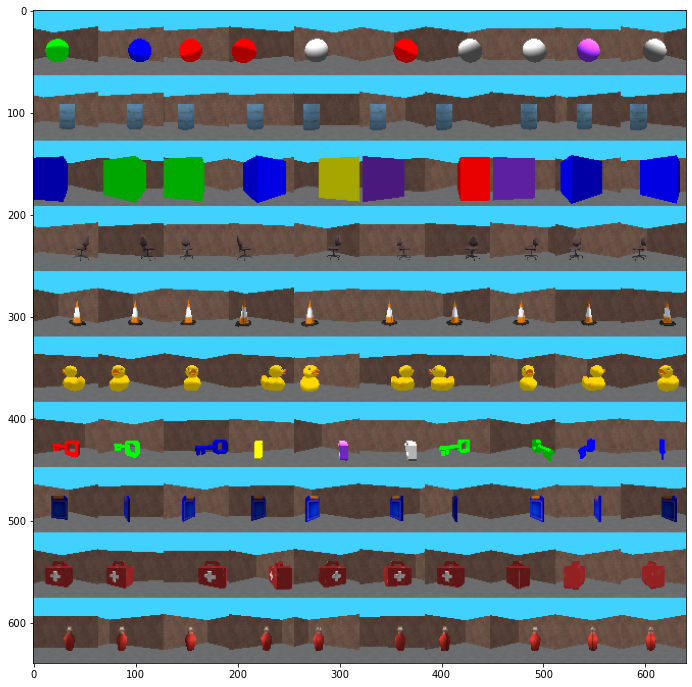

In [6]:
img = tile_images(train_frames[::10])
plt.imshow(img)
train_labels[::25]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

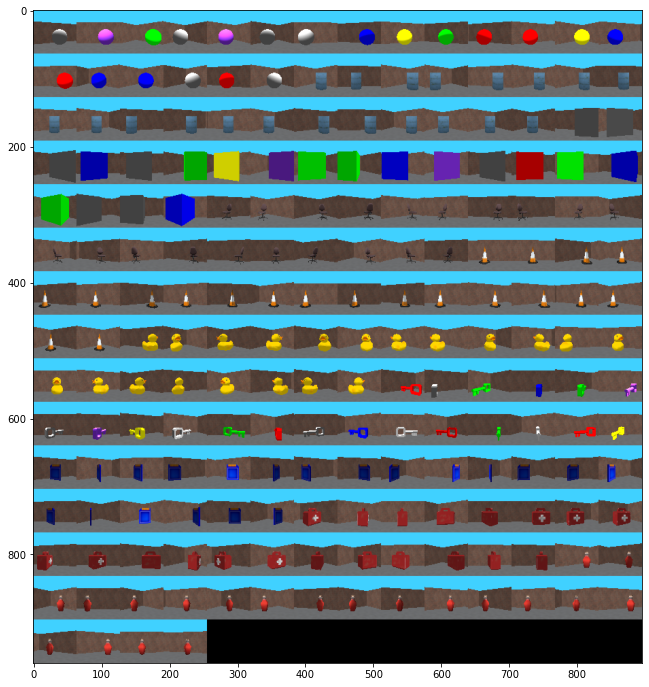

In [7]:
img = tile_images(test_frames)
plt.imshow(img)
test_labels[::5]

In [9]:
np.savez('lookatobjs_dataset.npz', train_frames=train_frames, train_labels=train_labels, test_frames=test_frames, test_labels=test_labels)